Running Model-1359: 4500it [00:03, 1409.10it/s]<?, ?it/s]
Running Model-1359: 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]


Fitting node Ridge-1359...


Running Model-1359: 470it [00:00, 1459.68it/s]           


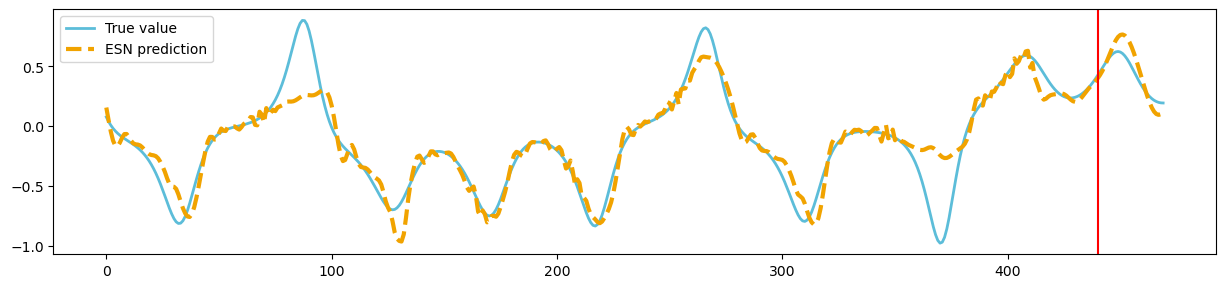

In [73]:
#Для построения архитектуры ESN использовалась библиотека reservoirPy, основанная на графовых вычислениях
import numpy as np
import math
import matplotlib.pyplot as plt
from reservoirpy.datasets import to_forecasting # разбиение на train/test
import reservoirpy as rpy
from reservoirpy.nodes import Reservoir, Ridge #узлы резервуара и считывающего слоя
from reservoirpy.observables import nrmse, rsquare
import json
from scipy.integrate import solve_ivp

length = 5000
train = 4500
forecast = 30

###ПОДГОТОВКА ДАННЫХ
#9
import warnings
from nolitsa import data

dt = 0.01
x0 = [-5000.0, -2800.0, 10000.0]

#000
x1 = data.lorenz(length=6500, sample=dt, x0=x0,
               sigma=16.0, beta=4.0, rho=45.92)[1]

#11
import copy
time = copy.deepcopy(x1) 
X1 = time[:,0] 
X1 = X1.reshape(6500,1) 
X1 = 2 * (X1 - X1.min()) / (X1.max() - X1.min()) - 1 
#000
    
X = X1[:5000]


def results(y_pred, y_test):
    fig = plt.figure(figsize=(15, 7))
    ax = plt.subplot(211)
    #ax.plot(np.arange(sample), y_test[len(y_test)-sample:], lw=2, label="True value", color="black")
    #ax.plot(np.arange(sample), y_pred[len(y_pred)-sample:], lw=3, label="ESN prediction", color="gray", linestyle="--")

    ax.plot(np.arange(len(y_test)), y_test, lw=2, label="True value", color="#5cbdd9")
    ax.plot(np.arange(len(y_pred)), y_pred, lw=3, label="ESN prediction", color="#f1a300", linestyle="--")
    ax.axvline(x=len(y_test)-forecast, color="red")  # Add vertical line
    ax.legend()
    plt.show()
    
###HERE0
from reservoirpy.datasets import to_forecasting

x, y = to_forecasting(X, forecast=forecast)

X_train1, y_train1 = x[:train], y[:train]
X_test1, y_test1 = x[train:], y[train:]

units = 830
leak_rate = 0.55
spectral_radius = 0.6
input_scaling = 3.
connectivity = 0.51
input_connectivity = 0.51
regularization = 1.e-08
seed = 1934

#узел резервуара
reservoir = Reservoir(units, input_scaling=input_scaling, sr=spectral_radius,
                      lr=leak_rate, rc_connectivity=connectivity,
                      input_connectivity=input_connectivity, seed=seed)
#выходной слой(считывающее устройство)
readout = Ridge(1, ridge=regularization) # 1 - кол-во выходных нейронов
#соединяем узлы и таким образом получаем модель 
esn = reservoir >> readout

#обучение модели
esn = esn.fit(X_train1, y_train1)
#делаем предсказание
y_pred1 = esn.run(X_test1, reset=False)
results(y_pred1, X[train+forecast:])
###HERE1

In [74]:
def rmse(x_test, x_sim):
        res = 0
        for i in range(len(x_sim)):
            res = res + (x_sim[i] - x_test[i])**2
        res = math.sqrt(res/len(x_sim))
        return res

rmse(y_pred1[-100:], X[-100:])

C:\Users\nicks\AppData\Local\Temp\ipykernel_6188\561460902.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = math.sqrt(res/len(x_sim))


0.17566456637346325

In [75]:
BestRmse = 0.24252096269990214
BestHyp = np.empty((8, 1))

BestHyp[0] = 830
BestHyp[1] = 0.55
BestHyp[2] = 0.6
BestHyp[3] = 3.
BestHyp[4] = 0.51
BestHyp[5] = 0.51
BestHyp[6] = 1.e-08
BestHyp[7] = 1934

units = 830
leak_rate = 0.55
spectral_radius = 0.6
input_scaling = 3.
connectivity = 0.51
input_connectivity = 0.51
regularization = 1.e-08
seed = 1934

In [76]:
Units = np.arange(700, 850, 50)
Leak_rate = np.arange(0.4, 0.6, 0.1)
Spectral_radius = np.arange(0.5, 0.7, 0.1)
Input_scaling = np.arange(2.5, 4.0, 1.0)
Connectivity = np.arange(0.51, 0.71, 0.1)
Input_connectivity = np.arange(0.51, 0.91, 0.1)
Regularization = np.arange((1.e-08)-1, (1.e-08)+1, 1.0)
Seed = np.arange(1734, 2434, 400)

In [77]:
print(Units.shape)
print(Leak_rate.shape)
print(Spectral_radius.shape) 
print(Input_scaling.shape) 
print(Connectivity.shape) 
print(Input_connectivity.shape) 
print(Regularization.shape) 
print(Seed.shape) 

(3,)
(2,)
(2,)
(2,)
(2,)
(4,)
(2,)
(2,)


In [78]:
for q in range(len(Units)):
    for w in range(len(Leak_rate)):
        
            for r in range(len(Input_scaling)):
                for t in range(len(Connectivity)):
                    for z in range(len(Input_connectivity)):
                        for u in range(len(Regularization)):
                            
                                #Первый тестовый набор параметров 
                                units = Units[q]
                                leak_rate = Leak_rate[w] #коэффициент утечки от 0 до 1
                                
                                input_scaling = Input_scaling[r]
                                connectivity = Connectivity[t] #от 0 до 1
                                input_connectivity = Input_connectivity[z] #тоже %
                                regularization = Regularization[u]

                                #узел резервуара
                                reservoir = Reservoir(units, input_scaling=input_scaling, sr=spectral_radius,
                                                    lr=leak_rate, rc_connectivity=connectivity,
                                                    input_connectivity=input_connectivity, seed=seed)
                                #выходной слой(считывающее устройство)
                                readout = Ridge(1, ridge=regularization) # 1 - кол-во выходных нейронов
                                #соединяем узлы и таким образом получаем модель 
                                esn = reservoir >> readout

                                #обучение модели
                                esn = esn.fit(X_train1, y_train1)
                                #делаем предсказание
                                y_pred1 = esn.run(X_test1, reset=False)
                                #results(y_pred1, X[train+forecast:])
                                Rmse = rmse(y_pred1[-100:], X[-100:])
                                if (Rmse<BestRmse):
                                    BestRmse = Rmse
                                    BestHyp[0] = Units[q]
                                    BestHyp[1] = Leak_rate[w]
                                    
                                    BestHyp[3] = Input_scaling[r]
                                    BestHyp[4] = Connectivity[t]
                                    BestHyp[5] = Input_connectivity[z]
                                    BestHyp[6] = Regularization[u]
                            


Running Model-1360: 4500it [00:02, 1795.68it/s]<?, ?it/s]
Running Model-1360: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


Fitting node Ridge-1360...


Running Model-1360: 470it [00:00, 1709.11it/s]           
C:\Users\nicks\AppData\Local\Temp\ipykernel_6188\561460902.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = math.sqrt(res/len(x_sim))
Running Model-1361: 4500it [00:02, 1875.78it/s]<?, ?it/s]
Running Model-1361: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-1361...


Running Model-1361: 470it [00:00, 2499.43it/s]           
Running Model-1362: 4500it [00:02, 2197.46it/s]<?, ?it/s]
Running Model-1362: 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


Fitting node Ridge-1362...


Running Model-1362: 470it [00:00, 2445.06it/s]           
Running Model-1363: 4500it [00:02, 2153.11it/s]<?, ?it/s]
Running Model-1363: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Fitting node Ridge-1363...


Running Model-1363: 470it [00:00, 2434.89it/s]           
Running Model-1364: 4500it [00:02, 2185.52it/s]<?, ?it/s]
Running Model-1364: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


Fitting node Ridge-1364...


Running Model-1364: 470it [00:00, 1696.77it/s]           
Running Model-1365: 4500it [00:02, 1915.27it/s]<?, ?it/s]
Running Model-1365: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-1365...


Running Model-1365: 470it [00:00, 2217.23it/s]           
Running Model-1366: 4500it [00:02, 2096.91it/s]<?, ?it/s]
Running Model-1366: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fitting node Ridge-1366...


Running Model-1366: 470it [00:00, 2270.24it/s]           
Running Model-1367: 4500it [00:02, 2185.49it/s]<?, ?it/s]
Running Model-1367: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


Fitting node Ridge-1367...


Running Model-1367: 470it [00:00, 2655.26it/s]           
Running Model-1368: 4500it [00:02, 1913.27it/s]<?, ?it/s]
Running Model-1368: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-1368...


Running Model-1368: 470it [00:00, 2146.05it/s]           
Running Model-1369: 4500it [00:02, 1851.84it/s]<?, ?it/s]
Running Model-1369: 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


Fitting node Ridge-1369...


Running Model-1369: 470it [00:00, 1535.81it/s]           
Running Model-1370: 4500it [00:02, 1751.52it/s]<?, ?it/s]
Running Model-1370: 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]


Fitting node Ridge-1370...


Running Model-1370: 470it [00:00, 1910.53it/s]           
Running Model-1371: 4500it [00:02, 1877.01it/s]<?, ?it/s]
Running Model-1371: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-1371...


Running Model-1371: 470it [00:00, 1999.80it/s]           
Running Model-1372: 4500it [00:02, 1886.00it/s]<?, ?it/s]
Running Model-1372: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Fitting node Ridge-1372...


Running Model-1372: 470it [00:00, 1982.91it/s]           
Running Model-1373: 4500it [00:02, 1741.24it/s]<?, ?it/s]
Running Model-1373: 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


Fitting node Ridge-1373...


Running Model-1373: 470it [00:00, 1643.30it/s]           
Running Model-1374: 4500it [00:02, 1843.50it/s]<?, ?it/s]
Running Model-1374: 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


Fitting node Ridge-1374...


Running Model-1374: 470it [00:00, 2034.36it/s]           
Running Model-1375: 4500it [00:02, 1926.35it/s]<?, ?it/s]
Running Model-1375: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Fitting node Ridge-1375...


Running Model-1375: 470it [00:00, 1933.93it/s]           
Running Model-1376: 4500it [00:01, 2252.28it/s]<?, ?it/s]
Running Model-1376: 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Fitting node Ridge-1376...


Running Model-1376: 470it [00:00, 2281.22it/s]           
Running Model-1377: 4500it [00:02, 2204.48it/s]<?, ?it/s]
Running Model-1377: 100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


Fitting node Ridge-1377...


Running Model-1377: 470it [00:00, 2385.67it/s]           
Running Model-1378: 4500it [00:02, 2006.23it/s]<?, ?it/s]
Running Model-1378: 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


Fitting node Ridge-1378...


Running Model-1378: 470it [00:00, 1918.38it/s]           
Running Model-1379: 4500it [00:02, 2058.99it/s]<?, ?it/s]
Running Model-1379: 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


Fitting node Ridge-1379...


Running Model-1379: 470it [00:00, 2434.77it/s]           
Running Model-1380: 4500it [00:02, 2174.35it/s]<?, ?it/s]
Running Model-1380: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


Fitting node Ridge-1380...


Running Model-1380: 470it [00:00, 2248.87it/s]           
Running Model-1381: 4500it [00:02, 2182.13it/s]<?, ?it/s]
Running Model-1381: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


Fitting node Ridge-1381...


Running Model-1381: 470it [00:00, 2303.86it/s]           
Running Model-1382: 4500it [00:01, 2261.27it/s]<?, ?it/s]
Running Model-1382: 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Fitting node Ridge-1382...


Running Model-1382: 470it [00:00, 2361.55it/s]           
Running Model-1383: 4500it [00:02, 2232.04it/s]<?, ?it/s]
Running Model-1383: 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


Fitting node Ridge-1383...


Running Model-1383: 470it [00:00, 2017.02it/s]           
Running Model-1384: 4500it [00:02, 1720.07it/s]<?, ?it/s]
Running Model-1384: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-1384...


Running Model-1384: 470it [00:00, 1991.33it/s]           
Running Model-1385: 4500it [00:02, 1910.83it/s]<?, ?it/s]
Running Model-1385: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-1385...


Running Model-1385: 470it [00:00, 1950.21it/s]           
Running Model-1386: 4500it [00:02, 1899.48it/s]<?, ?it/s]
Running Model-1386: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-1386...


Running Model-1386: 470it [00:00, 1934.04it/s]           
Running Model-1387: 4500it [00:02, 1853.36it/s]<?, ?it/s]
Running Model-1387: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


Fitting node Ridge-1387...


Running Model-1387: 470it [00:00, 1793.89it/s]           
Running Model-1388: 4500it [00:02, 1814.38it/s]<?, ?it/s]
Running Model-1388: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


Fitting node Ridge-1388...


Running Model-1388: 470it [00:00, 1964.71it/s]           
Running Model-1389: 4500it [00:02, 1922.23it/s]<?, ?it/s]
Running Model-1389: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Fitting node Ridge-1389...


Running Model-1389: 470it [00:00, 1933.98it/s]           
Running Model-1390: 4500it [00:02, 1874.21it/s]<?, ?it/s]
Running Model-1390: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-1390...


Running Model-1390: 470it [00:00, 1926.00it/s]           
Running Model-1391: 4500it [00:02, 1817.94it/s]<?, ?it/s]
Running Model-1391: 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]


Fitting node Ridge-1391...


Running Model-1391: 470it [00:00, 1613.13it/s]           
Running Model-1392: 4500it [00:02, 2042.38it/s]<?, ?it/s]
Running Model-1392: 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


Fitting node Ridge-1392...


Running Model-1392: 470it [00:00, 1950.17it/s]           
Running Model-1393: 4500it [00:02, 2182.34it/s]<?, ?it/s]
Running Model-1393: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


Fitting node Ridge-1393...


Running Model-1393: 470it [00:00, 2206.40it/s]           
Running Model-1394: 4500it [00:02, 2194.03it/s]<?, ?it/s]
Running Model-1394: 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


Fitting node Ridge-1394...


Running Model-1394: 470it [00:00, 2349.83it/s]           
Running Model-1395: 4500it [00:02, 2199.22it/s]<?, ?it/s]
Running Model-1395: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]


Fitting node Ridge-1395...


Running Model-1395: 470it [00:00, 2420.86it/s]           
Running Model-1396: 4500it [00:02, 2195.93it/s]<?, ?it/s]
Running Model-1396: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]


Fitting node Ridge-1396...


Running Model-1396: 470it [00:00, 2196.26it/s]           
Running Model-1397: 4500it [00:02, 1882.83it/s]<?, ?it/s]
Running Model-1397: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-1397...


Running Model-1397: 470it [00:00, 2136.30it/s]           
Running Model-1398: 4500it [00:02, 2145.33it/s]<?, ?it/s]
Running Model-1398: 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


Fitting node Ridge-1398...


Running Model-1398: 470it [00:00, 2227.55it/s]           
Running Model-1399: 4500it [00:02, 2237.69it/s]<?, ?it/s]
Running Model-1399: 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


Fitting node Ridge-1399...


Running Model-1399: 470it [00:00, 1702.92it/s]           
Running Model-1400: 4500it [00:02, 1907.56it/s]<?, ?it/s]
Running Model-1400: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-1400...


Running Model-1400: 470it [00:00, 1437.21it/s]           
Running Model-1401: 4500it [00:02, 1904.34it/s]<?, ?it/s]
Running Model-1401: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-1401...


Running Model-1401: 470it [00:00, 1857.81it/s]           
Running Model-1402: 4500it [00:02, 1706.13it/s]<?, ?it/s]
Running Model-1402: 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


Fitting node Ridge-1402...


Running Model-1402: 470it [00:00, 2136.14it/s]           
Running Model-1403: 4500it [00:02, 1854.78it/s]<?, ?it/s]
Running Model-1403: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


Fitting node Ridge-1403...


Running Model-1403: 470it [00:00, 2015.91it/s]           
Running Model-1404: 4500it [00:02, 1895.73it/s]<?, ?it/s]
Running Model-1404: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-1404...


Running Model-1404: 470it [00:00, 2043.45it/s]           
Running Model-1405: 4500it [00:02, 1920.59it/s]<?, ?it/s]
Running Model-1405: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-1405...


Running Model-1405: 470it [00:00, 1721.62it/s]           
Running Model-1406: 4500it [00:02, 1780.94it/s]<?, ?it/s]
Running Model-1406: 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]


Fitting node Ridge-1406...


Running Model-1406: 470it [00:00, 1926.23it/s]           
Running Model-1407: 4500it [00:02, 1875.76it/s]<?, ?it/s]
Running Model-1407: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-1407...


Running Model-1407: 470it [00:00, 2025.71it/s]           
Running Model-1408: 4500it [00:01, 2250.90it/s]<?, ?it/s]
Running Model-1408: 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


Fitting node Ridge-1408...


Running Model-1408: 470it [00:00, 1925.95it/s]           
Running Model-1409: 4500it [00:01, 2257.89it/s]<?, ?it/s]
Running Model-1409: 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]


Fitting node Ridge-1409...


Running Model-1409: 470it [00:00, 2435.05it/s]           
Running Model-1410: 4500it [00:02, 2097.92it/s]<?, ?it/s]
Running Model-1410: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Fitting node Ridge-1410...


Running Model-1410: 470it [00:00, 2186.17it/s]           
Running Model-1411: 4500it [00:02, 2033.72it/s]<?, ?it/s]
Running Model-1411: 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]


Fitting node Ridge-1411...


Running Model-1411: 470it [00:00, 1887.46it/s]           
Running Model-1412: 4500it [00:02, 2196.17it/s]<?, ?it/s]
Running Model-1412: 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]


Fitting node Ridge-1412...


Running Model-1412: 470it [00:00, 2281.25it/s]           
Running Model-1413: 4500it [00:02, 2215.87it/s]<?, ?it/s]
Running Model-1413: 100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


Fitting node Ridge-1413...


Running Model-1413: 470it [00:00, 2314.98it/s]           
Running Model-1414: 4500it [00:02, 2202.65it/s]<?, ?it/s]
Running Model-1414: 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


Fitting node Ridge-1414...


Running Model-1414: 470it [00:00, 2397.79it/s]           
Running Model-1415: 4500it [00:02, 2178.09it/s]<?, ?it/s]
Running Model-1415: 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


Fitting node Ridge-1415...


Running Model-1415: 470it [00:00, 2349.97it/s]           
Running Model-1416: 4500it [00:02, 1637.28it/s]<?, ?it/s]
Running Model-1416: 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]


Fitting node Ridge-1416...


Running Model-1416: 470it [00:00, 1950.17it/s]           
Running Model-1417: 4500it [00:02, 1896.78it/s]<?, ?it/s]
Running Model-1417: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-1417...


Running Model-1417: 470it [00:00, 1999.97it/s]           
Running Model-1418: 4500it [00:02, 1880.37it/s]<?, ?it/s]
Running Model-1418: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Fitting node Ridge-1418...


Running Model-1418: 470it [00:00, 1991.63it/s]           
Running Model-1419: 4500it [00:02, 1897.13it/s]<?, ?it/s]
Running Model-1419: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-1419...


Running Model-1419: 470it [00:00, 1654.79it/s]           
Running Model-1420: 4500it [00:02, 1736.11it/s]<?, ?it/s]
Running Model-1420: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


Fitting node Ridge-1420...


Running Model-1420: 470it [00:00, 1740.67it/s]           
Running Model-1421: 4500it [00:02, 1886.00it/s]<?, ?it/s]
Running Model-1421: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Fitting node Ridge-1421...


Running Model-1421: 470it [00:00, 2017.11it/s]           
Running Model-1422: 4500it [00:02, 1873.43it/s]<?, ?it/s]
Running Model-1422: 100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Fitting node Ridge-1422...


Running Model-1422: 470it [00:00, 2025.72it/s]           
Running Model-1423: 4500it [00:02, 1889.17it/s]<?, ?it/s]
Running Model-1423: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Fitting node Ridge-1423...


Running Model-1423: 470it [00:00, 1880.00it/s]           
Running Model-1424: 4500it [00:02, 1780.68it/s]<?, ?it/s]
Running Model-1424: 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


Fitting node Ridge-1424...


Running Model-1424: 470it [00:00, 2088.69it/s]           
Running Model-1425: 4500it [00:02, 1923.08it/s]<?, ?it/s]
Running Model-1425: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Fitting node Ridge-1425...


Running Model-1425: 470it [00:00, 2008.63it/s]           
Running Model-1426: 4500it [00:02, 1918.13it/s]<?, ?it/s]
Running Model-1426: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-1426...


Running Model-1426: 470it [00:00, 2097.90it/s]           
Running Model-1427: 4500it [00:02, 1956.51it/s]<?, ?it/s]
Running Model-1427: 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]


Fitting node Ridge-1427...


Running Model-1427: 470it [00:00, 2016.92it/s]           
Running Model-1428: 4500it [00:02, 1947.03it/s]<?, ?it/s]
Running Model-1428: 100%|██████████| 1/1 [00:02<00:00,  2.37s/it]


Fitting node Ridge-1428...


Running Model-1428: 470it [00:00, 2126.45it/s]           
Running Model-1429: 4500it [00:02, 1724.12it/s]<?, ?it/s]
Running Model-1429: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Fitting node Ridge-1429...


Running Model-1429: 470it [00:00, 1987.78it/s]           
Running Model-1430: 4500it [00:02, 1931.79it/s]<?, ?it/s]
Running Model-1430: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Fitting node Ridge-1430...


Running Model-1430: 470it [00:00, 2079.37it/s]           
Running Model-1431: 4500it [00:02, 1812.32it/s]<?, ?it/s]
Running Model-1431: 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


Fitting node Ridge-1431...


Running Model-1431: 470it [00:00, 2070.54it/s]           
Running Model-1432: 4500it [00:02, 1686.01it/s]<?, ?it/s]
Running Model-1432: 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


Fitting node Ridge-1432...


Running Model-1432: 470it [00:00, 1786.97it/s]           
Running Model-1433: 4500it [00:02, 1679.10it/s]<?, ?it/s]
Running Model-1433: 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]


Fitting node Ridge-1433...


Running Model-1433: 470it [00:00, 1556.20it/s]           
Running Model-1434: 4500it [00:02, 1565.15it/s]<?, ?it/s]
Running Model-1434: 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]


Fitting node Ridge-1434...


Running Model-1434: 470it [00:00, 1690.49it/s]           
Running Model-1435: 4500it [00:02, 1665.43it/s]<?, ?it/s]
Running Model-1435: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]


Fitting node Ridge-1435...


Running Model-1435: 470it [00:00, 1727.94it/s]           
Running Model-1436: 4500it [00:02, 1573.96it/s]<?, ?it/s]
Running Model-1436: 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]


Fitting node Ridge-1436...


Running Model-1436: 470it [00:00, 1734.19it/s]           
Running Model-1437: 4500it [00:03, 1465.02it/s]<?, ?it/s]
Running Model-1437: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


Fitting node Ridge-1437...


Running Model-1437: 470it [00:00, 1587.85it/s]           
Running Model-1438: 4500it [00:02, 1594.23it/s]<?, ?it/s]
Running Model-1438: 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]


Fitting node Ridge-1438...


Running Model-1438: 470it [00:00, 1390.48it/s]           
Running Model-1439: 4500it [00:02, 1646.05it/s]<?, ?it/s]
Running Model-1439: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


Fitting node Ridge-1439...


Running Model-1439: 470it [00:00, 1708.84it/s]           
Running Model-1440: 4500it [00:02, 1921.75it/s]<?, ?it/s]
Running Model-1440: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Fitting node Ridge-1440...


Running Model-1440: 470it [00:00, 2025.84it/s]           
Running Model-1441: 4500it [00:02, 1917.78it/s]<?, ?it/s]
Running Model-1441: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-1441...


Running Model-1441: 470it [00:00, 1999.82it/s]           
Running Model-1442: 4500it [00:02, 1853.19it/s]<?, ?it/s]
Running Model-1442: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


Fitting node Ridge-1442...


Running Model-1442: 470it [00:00, 1879.80it/s]           
Running Model-1443: 4500it [00:02, 1799.15it/s]<?, ?it/s]
Running Model-1443: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-1443...


Running Model-1443: 470it [00:00, 1800.80it/s]           
Running Model-1444: 4500it [00:02, 1945.29it/s]<?, ?it/s]
Running Model-1444: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


Fitting node Ridge-1444...


Running Model-1444: 470it [00:00, 1849.73it/s]           
Running Model-1445: 4500it [00:02, 1919.00it/s]<?, ?it/s]
Running Model-1445: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Fitting node Ridge-1445...


Running Model-1445: 470it [00:00, 2060.89it/s]           
Running Model-1446: 4500it [00:02, 1918.21it/s]<?, ?it/s]
Running Model-1446: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Fitting node Ridge-1446...


Running Model-1446: 470it [00:00, 2126.35it/s]           
Running Model-1447: 4500it [00:02, 1795.59it/s]<?, ?it/s]
Running Model-1447: 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


Fitting node Ridge-1447...


Running Model-1447: 470it [00:00, 1660.78it/s]           
Running Model-1448: 4500it [00:02, 1514.17it/s]<?, ?it/s]
Running Model-1448: 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]


Fitting node Ridge-1448...


Running Model-1448: 470it [00:00, 1690.54it/s]           
Running Model-1449: 4500it [00:02, 1626.83it/s]<?, ?it/s]
Running Model-1449: 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]


Fitting node Ridge-1449...


Running Model-1449: 470it [00:00, 1734.15it/s]           
Running Model-1450: 4500it [00:02, 1613.34it/s]<?, ?it/s]
Running Model-1450: 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]


Fitting node Ridge-1450...


Running Model-1450: 470it [00:00, 1696.53it/s]           
Running Model-1451: 4500it [00:02, 1637.51it/s]<?, ?it/s]
Running Model-1451: 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]


Fitting node Ridge-1451...


Running Model-1451: 470it [00:00, 1535.79it/s]           
Running Model-1452: 4500it [00:02, 1544.19it/s]<?, ?it/s]
Running Model-1452: 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]


Fitting node Ridge-1452...


Running Model-1452: 470it [00:00, 1744.70it/s]           
Running Model-1453: 4500it [00:02, 1625.07it/s]<?, ?it/s]
Running Model-1453: 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]


Fitting node Ridge-1453...


Running Model-1453: 470it [00:00, 1615.12it/s]           
Running Model-1454: 4500it [00:02, 1638.32it/s]<?, ?it/s]
Running Model-1454: 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


Fitting node Ridge-1454...


Running Model-1454: 470it [00:00, 1775.57it/s]           
Running Model-1455: 4500it [00:02, 1660.20it/s]<?, ?it/s]
Running Model-1455: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]


Fitting node Ridge-1455...


Running Model-1455: 470it [00:00, 1740.61it/s]           
Running Model-1456: 4500it [00:02, 1604.13it/s]<?, ?it/s]
Running Model-1456: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


Fitting node Ridge-1456...


Running Model-1456: 470it [00:00, 1890.44it/s]           
Running Model-1457: 4500it [00:02, 1836.19it/s]<?, ?it/s]
Running Model-1457: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


Fitting node Ridge-1457...


Running Model-1457: 470it [00:00, 1982.88it/s]           
Running Model-1458: 4500it [00:02, 1878.22it/s]<?, ?it/s]
Running Model-1458: 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Fitting node Ridge-1458...


Running Model-1458: 470it [00:00, 2043.47it/s]           
Running Model-1459: 4500it [00:02, 1904.85it/s]<?, ?it/s]
Running Model-1459: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-1459...


Running Model-1459: 470it [00:00, 2000.01it/s]           
Running Model-1460: 4500it [00:02, 1902.51it/s]<?, ?it/s]
Running Model-1460: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-1460...


Running Model-1460: 470it [00:00, 1991.33it/s]           
Running Model-1461: 4500it [00:02, 1753.33it/s]<?, ?it/s]
Running Model-1461: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Fitting node Ridge-1461...


Running Model-1461: 470it [00:00, 1810.14it/s]           
Running Model-1462: 4500it [00:02, 1834.69it/s]<?, ?it/s]
Running Model-1462: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


Fitting node Ridge-1462...


Running Model-1462: 470it [00:00, 1974.75it/s]           
Running Model-1463: 4500it [00:02, 1924.42it/s]<?, ?it/s]
Running Model-1463: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Fitting node Ridge-1463...


Running Model-1463: 470it [00:00, 2003.26it/s]           
Running Model-1464: 4500it [00:02, 1619.22it/s]<?, ?it/s]
Running Model-1464: 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]


Fitting node Ridge-1464...


Running Model-1464: 470it [00:00, 1760.32it/s]           
Running Model-1465: 4500it [00:02, 1596.77it/s]<?, ?it/s]
Running Model-1465: 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


Fitting node Ridge-1465...


Running Model-1465: 470it [00:00, 1461.59it/s]           
Running Model-1466: 4500it [00:02, 1538.11it/s]<?, ?it/s]
Running Model-1466: 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]


Fitting node Ridge-1466...


Running Model-1466: 470it [00:00, 1760.28it/s]           
Running Model-1467: 4500it [00:02, 1642.01it/s]<?, ?it/s]
Running Model-1467: 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]


Fitting node Ridge-1467...


Running Model-1467: 470it [00:00, 1672.93it/s]           
Running Model-1468: 4500it [00:02, 1641.52it/s]<?, ?it/s]
Running Model-1468: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


Fitting node Ridge-1468...


Running Model-1468: 470it [00:00, 1770.28it/s]           
Running Model-1469: 4500it [00:02, 1650.03it/s]<?, ?it/s]
Running Model-1469: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


Fitting node Ridge-1469...


Running Model-1469: 470it [00:00, 1516.09it/s]           
Running Model-1470: 4500it [00:02, 1537.04it/s]<?, ?it/s]
Running Model-1470: 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]


Fitting node Ridge-1470...


Running Model-1470: 470it [00:00, 1638.08it/s]           
Running Model-1471: 4500it [00:02, 1649.54it/s]<?, ?it/s]
Running Model-1471: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


Fitting node Ridge-1471...


Running Model-1471: 470it [00:00, 1753.61it/s]           
Running Model-1472: 4500it [00:02, 1912.91it/s]<?, ?it/s]
Running Model-1472: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Fitting node Ridge-1472...


Running Model-1472: 470it [00:00, 2136.38it/s]           
Running Model-1473: 4500it [00:02, 1894.47it/s]<?, ?it/s]
Running Model-1473: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Fitting node Ridge-1473...


Running Model-1473: 470it [00:00, 2052.23it/s]           
Running Model-1474: 4500it [00:02, 1803.74it/s]<?, ?it/s]
Running Model-1474: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


Fitting node Ridge-1474...


Running Model-1474: 470it [00:00, 2016.95it/s]           
Running Model-1475: 4500it [00:02, 1736.66it/s]<?, ?it/s]
Running Model-1475: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


Fitting node Ridge-1475...


Running Model-1475: 470it [00:00, 1997.68it/s]           
Running Model-1476: 4500it [00:02, 1936.64it/s]<?, ?it/s]
Running Model-1476: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Fitting node Ridge-1476...


Running Model-1476: 470it [00:00, 2005.00it/s]           
Running Model-1477: 4500it [00:02, 1906.67it/s]<?, ?it/s]
Running Model-1477: 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Fitting node Ridge-1477...


Running Model-1477: 470it [00:00, 1958.34it/s]           
Running Model-1478: 4500it [00:02, 1875.32it/s]<?, ?it/s]
Running Model-1478: 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Fitting node Ridge-1478...


Running Model-1478: 470it [00:00, 1983.05it/s]           
Running Model-1479: 4500it [00:02, 1811.42it/s]<?, ?it/s]
Running Model-1479: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


Fitting node Ridge-1479...


Running Model-1479: 470it [00:00, 1760.30it/s]           
Running Model-1480: 4500it [00:02, 1529.23it/s]<?, ?it/s]
Running Model-1480: 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]


Fitting node Ridge-1480...


Running Model-1480: 470it [00:00, 1710.43it/s]           
Running Model-1481: 4500it [00:02, 1656.99it/s]<?, ?it/s]
Running Model-1481: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]


Fitting node Ridge-1481...


Running Model-1481: 470it [00:00, 1740.35it/s]           
Running Model-1482: 4500it [00:02, 1640.02it/s]<?, ?it/s]
Running Model-1482: 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]


Fitting node Ridge-1482...


Running Model-1482: 470it [00:00, 1926.27it/s]           
Running Model-1483: 4500it [00:02, 1628.02it/s]<?, ?it/s]
Running Model-1483: 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]


Fitting node Ridge-1483...


Running Model-1483: 470it [00:00, 1734.33it/s]           
Running Model-1484: 4500it [00:03, 1497.77it/s]<?, ?it/s]
Running Model-1484: 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]


Fitting node Ridge-1484...


Running Model-1484: 470it [00:00, 1620.56it/s]           
Running Model-1485: 4500it [00:02, 1630.15it/s]<?, ?it/s]
Running Model-1485: 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]


Fitting node Ridge-1485...


Running Model-1485: 470it [00:00, 1704.68it/s]           
Running Model-1486: 4500it [00:02, 1652.77it/s]<?, ?it/s]
Running Model-1486: 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]


Fitting node Ridge-1486...


Running Model-1486: 470it [00:00, 1767.92it/s]           
Running Model-1487: 4500it [00:02, 1646.12it/s]<?, ?it/s]
Running Model-1487: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


Fitting node Ridge-1487...


Running Model-1487: 470it [00:00, 1428.35it/s]           
Running Model-1488: 4500it [00:02, 1581.08it/s]<?, ?it/s]
Running Model-1488: 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]


Fitting node Ridge-1488...


Running Model-1488: 470it [00:00, 1856.30it/s]           
Running Model-1489: 4500it [00:02, 1679.91it/s]<?, ?it/s]
Running Model-1489: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]


Fitting node Ridge-1489...


Running Model-1489: 470it [00:00, 1814.67it/s]           
Running Model-1490: 4500it [00:02, 1709.66it/s]<?, ?it/s]
Running Model-1490: 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


Fitting node Ridge-1490...


Running Model-1490: 470it [00:00, 1779.26it/s]           
Running Model-1491: 4500it [00:02, 1711.57it/s]<?, ?it/s]
Running Model-1491: 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


Fitting node Ridge-1491...


Running Model-1491: 470it [00:00, 1773.35it/s]           
Running Model-1492: 4500it [00:02, 1609.76it/s]<?, ?it/s]
Running Model-1492: 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


Fitting node Ridge-1492...


Running Model-1492: 470it [00:00, 1626.25it/s]           
Running Model-1493: 4500it [00:02, 1598.94it/s]<?, ?it/s]
Running Model-1493: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


Fitting node Ridge-1493...


Running Model-1493: 470it [00:00, 1773.48it/s]           
Running Model-1494: 4500it [00:02, 1684.70it/s]<?, ?it/s]
Running Model-1494: 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


Fitting node Ridge-1494...


Running Model-1494: 470it [00:00, 1276.50it/s]           
Running Model-1495: 4500it [00:02, 1594.34it/s]<?, ?it/s]
Running Model-1495: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


Fitting node Ridge-1495...


Running Model-1495: 470it [00:00, 1740.69it/s]           
Running Model-1496: 4500it [00:03, 1383.38it/s]<?, ?it/s]
Running Model-1496: 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]


Fitting node Ridge-1496...


Running Model-1496: 470it [00:00, 1402.81it/s]           
Running Model-1497: 4500it [00:03, 1230.25it/s]<?, ?it/s]
Running Model-1497: 100%|██████████| 1/1 [00:03<00:00,  3.71s/it]


Fitting node Ridge-1497...


Running Model-1497: 470it [00:00, 1511.29it/s]           
Running Model-1498: 4500it [00:03, 1395.80it/s]<?, ?it/s]
Running Model-1498: 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]


Fitting node Ridge-1498...


Running Model-1498: 470it [00:00, 1260.07it/s]           
Running Model-1499: 4500it [00:03, 1401.86it/s]<?, ?it/s]
Running Model-1499: 100%|██████████| 1/1 [00:03<00:00,  3.26s/it]


Fitting node Ridge-1499...


Running Model-1499: 470it [00:00, 1527.57it/s]           
Running Model-1500: 4500it [00:03, 1363.27it/s]<?, ?it/s]
Running Model-1500: 100%|██████████| 1/1 [00:03<00:00,  3.37s/it]


Fitting node Ridge-1500...


Running Model-1500: 470it [00:00, 1489.63it/s]           
Running Model-1501: 4500it [00:03, 1458.64it/s]<?, ?it/s]
Running Model-1501: 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]


Fitting node Ridge-1501...


Running Model-1501: 470it [00:00, 1587.27it/s]           
Running Model-1502: 4500it [00:03, 1482.88it/s]<?, ?it/s]
Running Model-1502: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


Fitting node Ridge-1502...


Running Model-1502: 470it [00:00, 1525.96it/s]           
Running Model-1503: 4500it [00:03, 1492.74it/s]<?, ?it/s]
Running Model-1503: 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]


Fitting node Ridge-1503...


Running Model-1503: 470it [00:00, 1566.56it/s]           
Running Model-1504: 4500it [00:02, 1532.91it/s]<?, ?it/s]
Running Model-1504: 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]


Fitting node Ridge-1504...


Running Model-1504: 470it [00:00, 1721.62it/s]           
Running Model-1505: 4500it [00:02, 1657.85it/s]<?, ?it/s]
Running Model-1505: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]


Fitting node Ridge-1505...


Running Model-1505: 470it [00:00, 1773.46it/s]           
Running Model-1506: 4500it [00:02, 1697.89it/s]<?, ?it/s]
Running Model-1506: 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


Fitting node Ridge-1506...


Running Model-1506: 470it [00:00, 1773.12it/s]           
Running Model-1507: 4500it [00:02, 1718.46it/s]<?, ?it/s]
Running Model-1507: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


Fitting node Ridge-1507...


Running Model-1507: 470it [00:00, 1828.48it/s]           
Running Model-1508: 4500it [00:02, 1627.17it/s]<?, ?it/s]
Running Model-1508: 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]


Fitting node Ridge-1508...


Running Model-1508: 470it [00:00, 1760.36it/s]           
Running Model-1509: 4500it [00:02, 1575.51it/s]<?, ?it/s]
Running Model-1509: 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]


Fitting node Ridge-1509...


Running Model-1509: 470it [00:00, 1587.82it/s]           
Running Model-1510: 4500it [00:02, 1732.12it/s]<?, ?it/s]
Running Model-1510: 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


Fitting node Ridge-1510...


Running Model-1510: 470it [00:00, 1883.29it/s]           
Running Model-1511: 4500it [00:02, 1687.66it/s]<?, ?it/s]
Running Model-1511: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Fitting node Ridge-1511...


Running Model-1511: 470it [00:00, 1866.87it/s]           
Running Model-1512: 4500it [00:03, 1465.87it/s]<?, ?it/s]
Running Model-1512: 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]


Fitting node Ridge-1512...


Running Model-1512: 470it [00:00, 1386.32it/s]           
Running Model-1513: 4500it [00:03, 1362.82it/s]<?, ?it/s]
Running Model-1513: 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]


Fitting node Ridge-1513...


Running Model-1513: 470it [00:00, 1561.35it/s]           
Running Model-1514: 4500it [00:03, 1466.97it/s]<?, ?it/s]
Running Model-1514: 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]


Fitting node Ridge-1514...


Running Model-1514: 470it [00:00, 1246.67it/s]           
Running Model-1515: 4500it [00:03, 1468.22it/s]<?, ?it/s]
Running Model-1515: 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]


Fitting node Ridge-1515...


Running Model-1515: 470it [00:00, 1598.60it/s]           
Running Model-1516: 4500it [00:03, 1445.06it/s]<?, ?it/s]
Running Model-1516: 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]


Fitting node Ridge-1516...


Running Model-1516: 470it [00:00, 1342.86it/s]           
Running Model-1517: 4500it [00:03, 1421.32it/s]<?, ?it/s]
Running Model-1517: 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]


Fitting node Ridge-1517...


Running Model-1517: 470it [00:00, 1491.98it/s]           
Running Model-1518: 4500it [00:03, 1469.60it/s]<?, ?it/s]
Running Model-1518: 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]


Fitting node Ridge-1518...


Running Model-1518: 470it [00:00, 1532.77it/s]           
Running Model-1519: 4500it [00:03, 1491.39it/s]<?, ?it/s]
Running Model-1519: 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]


Fitting node Ridge-1519...


Running Model-1519: 470it [00:00, 1576.78it/s]           
Running Model-1520: 4500it [00:02, 1697.13it/s]<?, ?it/s]
Running Model-1520: 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


Fitting node Ridge-1520...


Running Model-1520: 470it [00:00, 1511.22it/s]           
Running Model-1521: 4500it [00:02, 1542.21it/s]<?, ?it/s]
Running Model-1521: 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]


Fitting node Ridge-1521...


Running Model-1521: 470it [00:00, 1766.75it/s]           
Running Model-1522: 4500it [00:02, 1706.53it/s]<?, ?it/s]
Running Model-1522: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


Fitting node Ridge-1522...


Running Model-1522: 470it [00:00, 1780.29it/s]           
Running Model-1523: 4500it [00:02, 1696.12it/s]<?, ?it/s]
Running Model-1523: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Fitting node Ridge-1523...


Running Model-1523: 470it [00:00, 1786.98it/s]           
Running Model-1524: 4500it [00:02, 1694.25it/s]<?, ?it/s]
Running Model-1524: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Fitting node Ridge-1524...


Running Model-1524: 470it [00:00, 1805.53it/s]           
Running Model-1525: 4500it [00:03, 1479.55it/s]<?, ?it/s]
Running Model-1525: 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]


Fitting node Ridge-1525...


Running Model-1525: 470it [00:00, 1750.93it/s]           
Running Model-1526: 4500it [00:02, 1601.38it/s]<?, ?it/s]
Running Model-1526: 100%|██████████| 1/1 [00:02<00:00,  2.88s/it]


Fitting node Ridge-1526...


Running Model-1526: 470it [00:00, 1666.63it/s]           
Running Model-1527: 4500it [00:03, 1477.69it/s]<?, ?it/s]
Running Model-1527: 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]


Fitting node Ridge-1527...


Running Model-1527: 470it [00:00, 1583.23it/s]           
Running Model-1528: 4500it [00:03, 1355.42it/s]<?, ?it/s]
Running Model-1528: 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]


Fitting node Ridge-1528...


Running Model-1528: 470it [00:00, 1588.66it/s]           
Running Model-1529: 4500it [00:03, 1349.74it/s]<?, ?it/s]
Running Model-1529: 100%|██████████| 1/1 [00:03<00:00,  3.45s/it]


Fitting node Ridge-1529...


Running Model-1529: 470it [00:00, 1478.25it/s]           
Running Model-1530: 4500it [00:03, 1448.64it/s]<?, ?it/s]
Running Model-1530: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


Fitting node Ridge-1530...


Running Model-1530: 470it [00:00, 1492.07it/s]           
Running Model-1531: 4500it [00:03, 1449.24it/s]<?, ?it/s]
Running Model-1531: 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]


Fitting node Ridge-1531...


Running Model-1531: 470it [00:00, 1540.85it/s]           
Running Model-1532: 4500it [00:03, 1445.38it/s]<?, ?it/s]
Running Model-1532: 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]


Fitting node Ridge-1532...


Running Model-1532: 470it [00:00, 1310.86it/s]           
Running Model-1533: 4500it [00:03, 1411.70it/s]<?, ?it/s]
Running Model-1533: 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]


Fitting node Ridge-1533...


Running Model-1533: 470it [00:00, 1550.10it/s]           
Running Model-1534: 4500it [00:03, 1483.57it/s]<?, ?it/s]
Running Model-1534: 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]


Fitting node Ridge-1534...


Running Model-1534: 470it [00:00, 1354.33it/s]           
Running Model-1535: 4500it [00:03, 1483.48it/s]<?, ?it/s]
Running Model-1535: 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]


Fitting node Ridge-1535...


Running Model-1535: 470it [00:00, 1551.16it/s]           
Running Model-1536: 4500it [00:02, 1706.01it/s]<?, ?it/s]
Running Model-1536: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


Fitting node Ridge-1536...


Running Model-1536: 470it [00:00, 1872.45it/s]           
Running Model-1537: 4500it [00:02, 1612.93it/s]<?, ?it/s]
Running Model-1537: 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


Fitting node Ridge-1537...


Running Model-1537: 470it [00:00, 1853.15it/s]           
Running Model-1538: 4500it [00:02, 1703.78it/s]<?, ?it/s]
Running Model-1538: 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


Fitting node Ridge-1538...


Running Model-1538: 470it [00:00, 1787.07it/s]           
Running Model-1539: 4500it [00:02, 1707.43it/s]<?, ?it/s]
Running Model-1539: 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


Fitting node Ridge-1539...


Running Model-1539: 470it [00:00, 1721.64it/s]           
Running Model-1540: 4500it [00:02, 1715.37it/s]<?, ?it/s]
Running Model-1540: 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


Fitting node Ridge-1540...


Running Model-1540: 470it [00:00, 1779.83it/s]           
Running Model-1541: 4500it [00:02, 1562.06it/s]<?, ?it/s]
Running Model-1541: 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]


Fitting node Ridge-1541...


Running Model-1541: 470it [00:00, 1487.20it/s]           
Running Model-1542: 4500it [00:02, 1685.25it/s]<?, ?it/s]
Running Model-1542: 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


Fitting node Ridge-1542...


Running Model-1542: 470it [00:00, 1721.54it/s]           
Running Model-1543: 4500it [00:02, 1715.87it/s]<?, ?it/s]
Running Model-1543: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


Fitting node Ridge-1543...


Running Model-1543: 470it [00:00, 1807.48it/s]           
Running Model-1544: 4500it [00:03, 1491.69it/s]<?, ?it/s]
Running Model-1544: 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]


Fitting node Ridge-1544...


Running Model-1544: 470it [00:00, 1540.29it/s]           
Running Model-1545: 4500it [00:03, 1422.32it/s]<?, ?it/s]
Running Model-1545: 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]


Fitting node Ridge-1545...


Running Model-1545: 470it [00:00, 1533.35it/s]           
Running Model-1546: 4500it [00:03, 1430.34it/s]<?, ?it/s]
Running Model-1546: 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]


Fitting node Ridge-1546...


Running Model-1546: 470it [00:00, 1296.38it/s]           
Running Model-1547: 4500it [00:03, 1487.81it/s]<?, ?it/s]
Running Model-1547: 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]


Fitting node Ridge-1547...


Running Model-1547: 470it [00:00, 1482.59it/s]           
Running Model-1548: 4500it [00:03, 1493.43it/s]<?, ?it/s]
Running Model-1548: 100%|██████████| 1/1 [00:03<00:00,  3.06s/it]


Fitting node Ridge-1548...


Running Model-1548: 470it [00:00, 1571.74it/s]           
Running Model-1549: 4500it [00:03, 1390.61it/s]<?, ?it/s]
Running Model-1549: 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]


Fitting node Ridge-1549...


Running Model-1549: 470it [00:00, 1394.64it/s]           
Running Model-1550: 4500it [00:03, 1428.77it/s]<?, ?it/s]
Running Model-1550: 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]


Fitting node Ridge-1550...


Running Model-1550: 470it [00:00, 1550.69it/s]           
Running Model-1551: 4500it [00:03, 1452.01it/s]<?, ?it/s]
Running Model-1551: 100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


Fitting node Ridge-1551...


Running Model-1551: 470it [00:00, 1541.00it/s]           


In [79]:
BestRmse, BestHyp

(0.14589299759734017,
 array([[7.00000000e+02],
        [4.00000000e-01],
        [6.00000000e-01],
        [3.50000000e+00],
        [6.10000000e-01],
        [8.10000000e-01],
        [1.00000001e-08],
        [1.93400000e+03]]))

In [80]:
print(BestHyp[0])
print(BestHyp[1])
print(BestHyp[2])
print(BestHyp[3])
print(BestHyp[4])
print(BestHyp[5])
print(BestHyp[6])
print(BestHyp[7])

[700.]
[0.4]
[0.6]
[3.5]
[0.61]
[0.81]
[1.00000001e-08]
[1934.]


Running Model-1552: 4500it [00:02, 1641.79it/s]<?, ?it/s]
Running Model-1552: 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]


Fitting node Ridge-1552...


Running Model-1552: 470it [00:00, 1786.65it/s]           


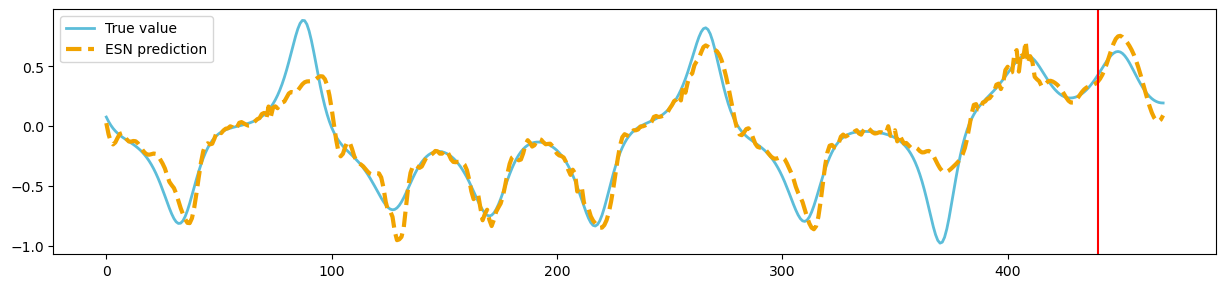

0.14600969813211642


C:\Users\nicks\AppData\Local\Temp\ipykernel_6188\561460902.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = math.sqrt(res/len(x_sim))


In [81]:
#Первый тестовый набор параметров 
units = 800
leak_rate = 0.5
spectral_radius = 0.6
input_scaling = 3.5
connectivity = 0.51
input_connectivity = 0.81
regularization = 1.00000001e-08
seed = 1734



#узел резервуара
reservoir = Reservoir(units, input_scaling=input_scaling, sr=spectral_radius,
                      lr=leak_rate, rc_connectivity=connectivity,
                      input_connectivity=input_connectivity, seed=seed)
#выходной слой(считывающее устройство)
readout = Ridge(1, ridge=regularization) # 1 - кол-во выходных нейронов
#соединяем узлы и таким образом получаем модель 
esn = reservoir >> readout

#обучение модели
esn = esn.fit(X_train1, y_train1)
#делаем предсказание
y_pred1 = esn.run(X_test1, reset=False)
results(y_pred1, X[train+forecast:])
print(rmse(y_pred1[-100:], X[-100:]))
###HERE1

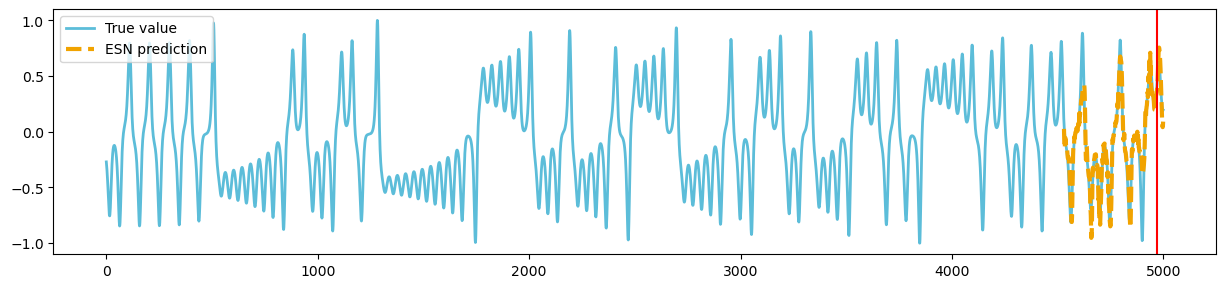

In [82]:
tmp = np.full(5000-len(y_pred1), None)
y_pred1_extended = np.concatenate([tmp.reshape(len(tmp), 1), y_pred1])
results(y_pred1_extended, X)